# Angular Momentum Budget

## Introduction

We're going to talk about three key budgets of materially conserved quantities:

1. Angular Momentum
2. Energy
3. Water Vapor

The general idea running through these topics is that we have a quantity that *obeys some conservation principle* embeded in the equations of motion, and that over a "long enough" time period that quantity must be in **steady state** in the atmosphere.

For any quantity in steady state, we must have a balance between local *sources* and *sinks* of that quantity and *flux divergence / convergence* of the same quantity.

### Vertical integrals

In addition to zonal and time averages, we will sometimes employ a vertical integral (weighted by mass):

$$ <A> = \frac{1}{g} \int_0^{p_s} A dp \approx \int_0^{\infty} A \rho dz $$

where $p_s$ is the surface pressure.

## Angular momentum basics

The total angular momentum of the solid Earth and its fluid components is approximately conserved.

Angular momentum is exchanged between the solid Earth and the atmosphere, but on greater than annual timescales, there should be no net exchange.

### Length of day

Changes in the angular momentum of the solid Earth are reflected in fluctuations of the [Length of Day](https://en.wikipedia.org/wiki/Day_length_fluctuations):

<p><a href="https://commons.wikimedia.org/wiki/File:Deviation_of_day_length_from_SI_day.svg#/media/File:Deviation_of_day_length_from_SI_day.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Deviation_of_day_length_from_SI_day.svg/1200px-Deviation_of_day_length_from_SI_day.svg.png" alt="Deviation of day length from SI day.svg"></a><br>By &lt;a href="//commons.wikimedia.org/w/index.php?title=User:%E2%85%A1_%E2%85%A6_%E2%85%AB&amp;amp;action=edit&amp;amp;redlink=1" class="new" title="User:Ⅱ Ⅶ Ⅻ (page does not exist)"&gt;Ⅱ Ⅶ Ⅻ&lt;/a&gt; - &lt;span class="int-own-work" lang="en"&gt;Own work&lt;/span&gt;, data: &lt;a href="https://en.wikipedia.org/wiki/IERS" class="extiw" title="en:IERS"&gt;IERS&lt;/a&gt; &lt;a rel="nofollow" class="external autonumber" href="http://hpiers.obspm.fr/eoppc/eop/eopc04/eopc04.62-now"&gt;[1]&lt;/a&gt;, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=9395571">Link</a></p>

There's clearly lots of interesting low-frequency variability, but for our purposes we'll pay most attention to the annual timescale: fluctuations of order 1 ms. It turns out that these are well-correlated with seasonal flucutations in atmospheric angular momentum.

### Definitions and notation

Let $\vec{r}$ be the position vector from the axis of rotation, and let $\vec{u}_a$ be the absolute velocity as measured in the *inertial* frame.

**Sketch of sphere**

Then we define the **angular momentum**

$$\vec{M} = \vec{r} \times \vec{u}_a $$

and its changes are governed by

$$ \frac{d\vec{M}}{dt} = \vec{r} \times \vec{F} $$

where $\vec{F}$ is the net force, and $\vec{r} \times \vec{F}$ is the net **torque**.

Two important torques we will discuss include the frictional torque and the mountain torque.

Now define the relative velocity $\vec{u}$ through

$$ \vec{u}_a = \vec{\Omega} \times \vec{r} + \vec{u} $$

where $\vec{\Omega}$ is the Earth's rotation vector. So the angular momentum can be written

\begin{align*}
\vec{M} &= \vec{r} \times \left( \vec{\Omega} \times \vec{r} + \vec{u} \right) \\
&= \Omega (a \cos\phi)^2 \hat{\Omega} + \vec{r} \times \vec{u}
\end{align*}

where $\hat{\Omega}$ is a unit vector aligned with the axis of rotation. This is valid for the thin-shell approximation, $z<<a$ where $a$ is the radius of the Earth.

The planetary component dictates the predominant direction of $\vec{M}$, so we are most interested in the component of $\vec{r} \times \vec{u}$ also parallel to $\hat{\Omega}$:

$$ \hat{\Omega} \cdot (\vec{r} \times \vec{u}) = u a \cos\phi $$

So let's define this (scalar) quantity:

$$ M = \Omega a^2 \cos^2\phi + u a \cos\phi $$

where the first term is the **planetary angular momentum** and the second term is the **relative angular momentum**.

## Absolute versus relative angular momentum in seasonal extremes

The plot below is reproduced from a very nice textbook, "An Introduction to the Global Circulation of the Atmosphere" by [David Randall](https://www.atmos.colostate.edu/people/faculty/randall/) (Colorado State University) {cite:t}`Randall:globalcirc`.

It shows the absolute angular momentum $M$ as well as just the relative component $M_{relative} = ua\cos\phi$ for the seasonal extremes of January and July.

Notice that the relative component is about two orders of magnitude smaller than the absolute.

:::{figure-md} markdown-fig
<img src="../images/angular-momentum-randall.png" alt="Absolute and relative angular momentum" class="bg-primary mb-1" width="800px">

The observed absolute (left panels) and relative (right panels) atmopspheric angular momentum per unit mass, for January and July. The units are $10^{7}$ m$^{2}$ s$^{-1}$. Source: {cite:t}`Randall:globalcirc`
:::

## Plotting angular momentum from CFSR data

Let's duplicate the plot above using one year of zonal wind ($u$) data from the CFSR.

Even though we're just using a single year, it's still a relatively big calculation because we start with a four dimensional dataset (lat, lon, time, and pressure levels) at 6-hourly resolution. We'll use some "lazy execution" tricks along the way to get our calculation done.

### Load the data using `chunks` to store as dask arrays

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

cfsr_path = '/cfsr/data/'
year = '2021'

ds = xr.open_dataset(cfsr_path + year + '/u.' + year + '.0p5.anl.nc', chunks={"time": 12})
ds

,Array,Chunk
Bytes,45.24 GiB,380.74 MiB
Shape,"(1460, 32, 361, 720)","(12, 32, 361, 720)"
Count,2 Graph Layers,122 Chunks
Type,float32,numpy.ndarray


### Planetary angular momentum

First we'll do the easy part: computing the planetary angular momentum from

$$ M_{planetary} = \Omega a^2 \cos^2\phi $$

We just need the planetary constants $\Omega$ and $a$ as well as the latitude axis from our dataset:

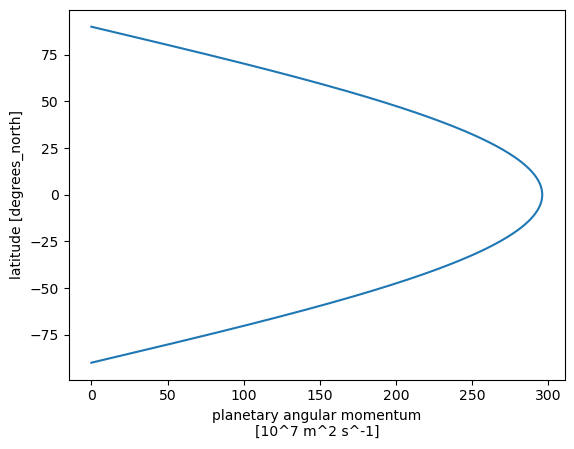

In [2]:
a = 6.371E6  # the mean planetary radius in meters
sidereal_period = (23*60 + 56)*60 + 4.09053  # Earth's rotational period in seconds -- just shy of one day
Omega = 2*np.pi / sidereal_period  # Earth's angular rotation rate (radians / second)

Mplanetary = Omega * a**2 * np.cos(np.deg2rad(ds.lat)) / 1E7 # put in same units as Randall figure
Mplanetary.attrs['long_name'] = 'planetary angular momentum'
Mplanetary.attrs['units'] = '10^7 m^2 s^-1'
Mplanetary.plot(y='lat');

### Computing relative angular momentum from zonal wind data

The formula is

$$ M_{relative} = u a \cos\phi $$

and we are mainly concerned here with zonal- and time averages. So we will start by zonally averaging the wind data:

In [3]:
u_zon = ds.u.mean(dim='lon')
u_zon

<xarray.DataArray 'u' (time: 1460, lev: 32, lat: 361)>
dask.array<mean_agg-aggregate, shape=(1460, 32, 361), dtype=float32, chunksize=(12, 32, 361), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0

Note that this is a very "cheap" operation because we haven't actually done the computation yet!

This is an example of "lazy" execution. We've just set up instructions about **how** to calculate the result. The actual computation will only occur when it's need (like when we try to plot a result).

#### Side note: transforming to height coordinates

Since Randall's figure is plotted with respect to height rather than pressure, let's add a new coordinate dimension to our dataset that represents approximate geopotential height.

This function just computes the integrated hydrostatic balance relation for an ideal gas at a constant reference temperature (which is all we need here since it's just for visual comparison):

In [4]:
def geopotential_height(p):
    '''Compute approximate geopotential height (km) from pressure based on hydrostatic balance at a reference temperature'''
    Rd = 287  # gas constant for dry air
    g = 9.8  # acceleration due to gravity
    Tref = 280.  # reference temperature in Kelvin
    ps = 1000.  # reference surface pressure in hPa
    return Rd*Tref/g * np.log(ps / p) / 1000.

Now let's define our new angular momentum variable, and give it some useful metadata (including our new vertical coordinate).

In [5]:
Mrelative = u_zon * a * np.cos(np.deg2rad(ds.lat)) / 1E7
Mrelative.attrs['long_name'] = 'relative angular momentum'
Mrelative.attrs['units'] = '10^7 m^2 s^-1'
Mrelative.coords['geopotential_height'] = geopotential_height(ds.lev)
Mrelative.geopotential_height.attrs['units'] = 'km'
Mrelative

<xarray.DataArray (time: 1460, lev: 32, lat: 361)>
dask.array<truediv, shape=(1460, 32, 361), dtype=float32, chunksize=(12, 32, 361), chunktype=numpy.ndarray>
Coordinates:
  * time                 (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:0...
  * lat                  (lat) float32 -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * lev                  (lev) float32 1e+03 975.0 950.0 ... 30.0 20.0 10.0
    geopotential_height  (lev) float32 0.0 0.2076 0.4206 ... 28.75 32.08 37.76
Attributes:
    long_name:  relative angular momentum
    units:      10^7 m^2 s^-1

Again, this is a very quick bit of code because it's lazy.

### Taking time averages over months

To match what's in Randall's figure, we need to take time averages over individual months (January and July). We can use `groupby` operations to our advantage here, and again take advantage of lazy execution.

We define the averages over all months, but we will only actually compute the two months of interest.

In [6]:
Mrelative_mon = Mrelative.groupby(Mrelative.time.dt.month).mean(dim='time')
Mrelative_mon

<xarray.DataArray (month: 12, lev: 32, lat: 361)>
dask.array<transpose, shape=(12, 32, 361), dtype=float32, chunksize=(1, 32, 361), chunktype=numpy.ndarray>
Coordinates:
  * lat                  (lat) float32 -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * lev                  (lev) float32 1e+03 975.0 950.0 ... 30.0 20.0 10.0
    geopotential_height  (lev) float32 0.0 0.2076 0.4206 ... 28.75 32.08 37.76
  * month                (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

### Time to actually compute a result!

By appending `.load()` to the end of our data objects, we force xarray to compute a result and store as numpy arrays rather than dask.

We'll just do this for the two months that we want to plot, and store the results in a dictionary for later.

In [7]:
Mrelative_computed = {'January': Mrelative_mon.sel(month=1).load(),
                      'July': Mrelative_mon.sel(month=7).load()
                     }

### And finally, let's make the plot!

I'll try to match the format and contour intervals of Randall's figure.

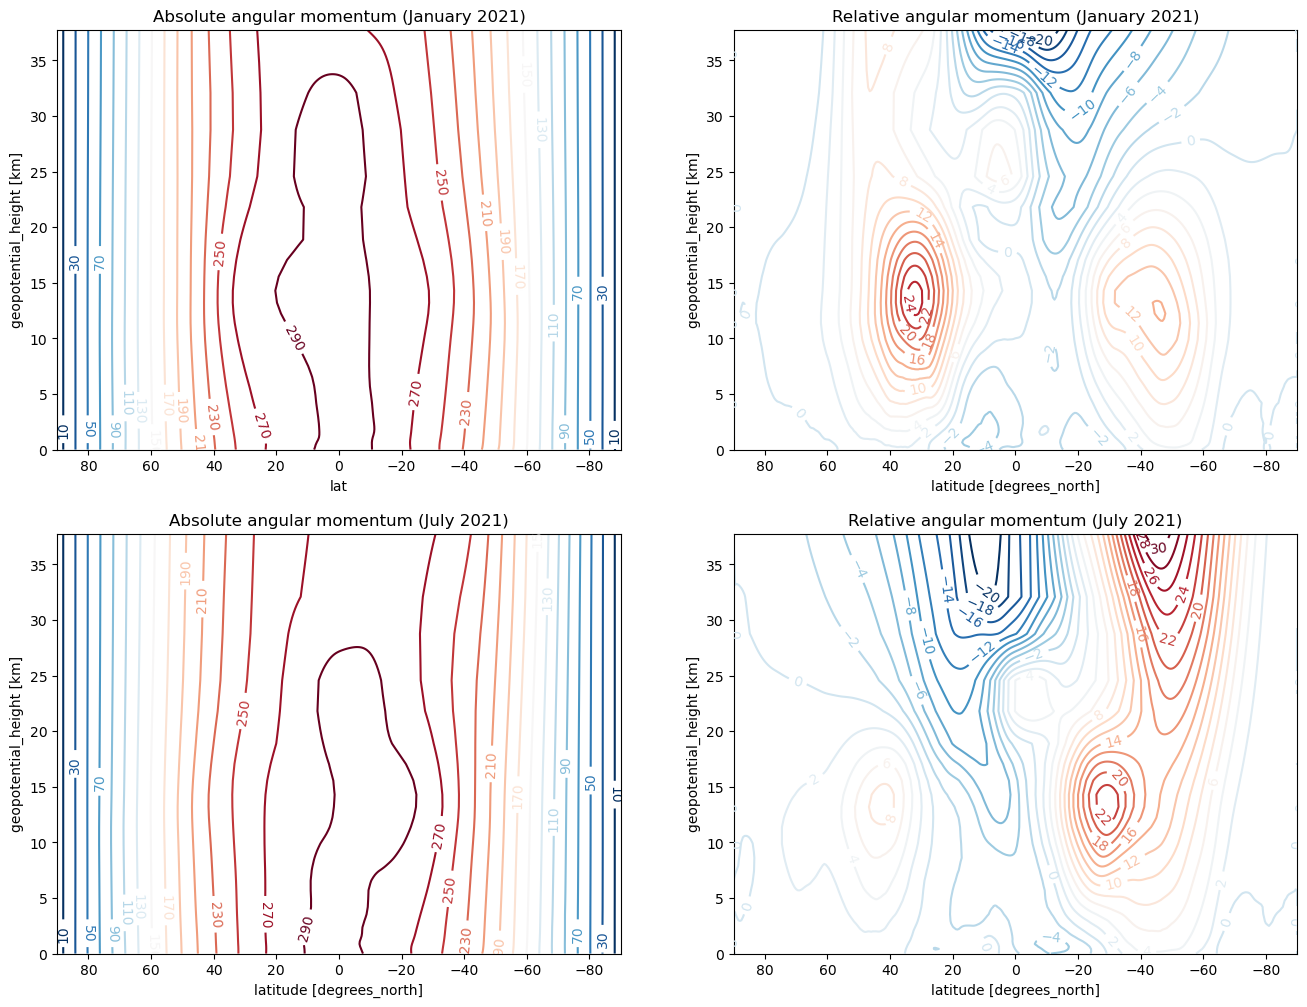

In [8]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

for index, mon in enumerate(['January', 'July']):
    thisMrelative = Mrelative_computed[mon]
    thisMabs = thisMrelative + Mplanetary
    CS = thisMabs.plot.contour(y='geopotential_height', levels=np.arange(10,300,20), xincrease=False, ax=axes[index,0])
    axes[index,0].clabel(CS)
    axes[index,0].set_title('Absolute angular momentum (' + mon + ' 2021)')
    CS = thisMrelative.plot.contour(y='geopotential_height', levels=np.arange(-20,32,2), xincrease=False, ax=axes[index,1])
    axes[index,1].clabel(CS)
    axes[index,1].set_title('Relative angular momentum (' + mon + ' 2021)')

## Conservation of angular momentum

### A motionless parcel moves poleward...

The total angular momentum of a parcel is conserved in the absence of torques:

$$\frac{DM}{dt} = 0$$

or in other words, the quantity

$$\Omega a^2 \cos^2\phi + u a \cos\phi $$

is conserved for a moving parcel.

The fact that we **live on a sphere** becomes an interesting part of this problem.

Consider what happens to a parcel that starts out *motionless* ($u = 0$) at the equator ($\phi = 0$). Its initial angular momentum is 

$$ M = \Omega a^2 $$

Now suppose this parcel moves toward the pole. Its *planetary* angular momentum decreases (since $\cos\phi$ is a decreasing function). This reflects the fact that the moment arm of the parcel (distance to the axis of rotation) gets smaller as the parcel moves poleward.

So to conserve total $M$, the zonal wind must increase!

Specifically in this situation, setting $M = \Omega a^2$ and solving for $u$ gives
$$ u = \Omega a \frac{ \sin^2\phi }{\cos\phi} $$


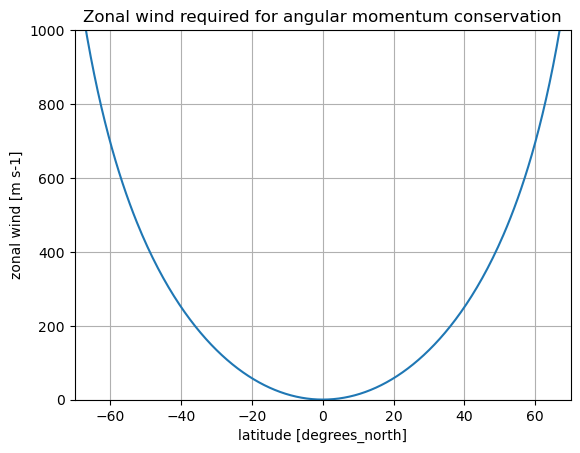

In [9]:
u_conserved = (Omega * a * np.sin(np.deg2rad(ds.lat))**2 / np.cos(np.deg2rad(ds.lat)))
u_conserved.attrs['long_name'] = 'zonal wind'
u_conserved.attrs['units'] = 'm s-1'
u_conserved.plot(xlim=(-70,70), ylim=(0,1000))
plt.grid()
plt.title('Zonal wind required for angular momentum conservation');

Key point here: notice that these required zonal wind values get very large (many hundreds of m/s)!

The effect of the shrinking moment arm as a parcel moves poleward seems to require **much larger zonal winds** that we actually observe. 

*Keep an eye on this as we explore the angular momentum budget of the observed atmosphere more fully.*

## Torques on the atmosphere

*Notes for this section haven't been written up yet. We will work on the board in class.*

### Conservation of angular momentum and torques

*in-class board work*

### Global conservation and mountain torque

*in-class board work*

### Observed torques

:::{figure-md} markdown-fig
<img src="../images/Huang_torque.pdf" alt="Zonally integrated torques" class="bg-primary mb-1" width="800px">

Observed zonally integrated torques on the atmosphere. Units are Hadleys per 3.8º latitude (1 Hadley = 10$^{18}$ kg m$^2$ s$^{-2}$. Source: {cite:t}`Huang:1999a`
:::

## Fluxes of angular momentum

The above figures of torques show that there is a net supply of angular momentum in the tropics and net sink of angular momentum in the midlatitudes.

How does the angular momentum get redistributed with latitude?

### Zonal and time averaged angular momentum budget

We can write the angular momentum equation in flux form and in pressure coordinates, and then take zonal and time averages:

$$ \frac{\partial \overline{[M]}}{\partial t} = -\frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} \left( \cos\phi [\overline{vM}] \right) - \frac{\partial}{\partial p} \left( [\overline{\omega M}] \right) - g \left[\frac{\partial \overline{z}}{\partial \lambda} \right]$$

and we can decompose the meridional flux $[\overline{vM}]$ into mean and eddy components

\begin{align*}
[\overline{vM}] &= [\overline{v}] \Omega a^2 \cos^2\phi + [\overline{uv}] a \cos\phi \\
&= [\overline{v}] \Omega a^2 \cos^2\phi + [\overline{u}][\overline{v}]a \cos\phi + [\overline{u}^* \overline{v}^*] a \cos\phi + [\overline{u^\prime v^\prime}]a \cos\phi 
\end{align*}

This equation says that the zonal, time mean meridional flux of angular momentum in comprised of

1. meridional flux of planetary angular momentum
2. meridonal flux of relative angular momentum by
    - mean meridional circulations
    - stationary eddies
    - transient eddies

### A classic view of the vertical structure of momentum fluxes

:::{figure-md} markdown-fig
<img src="../images/PO_fig11.7.pdf" alt="Momentum flux cross-sections" class="bg-primary mb-1" width="800px">

Zonal-mean cross section of the northward flux of momentum by all motions (a), transient eddies (b), stationary eddies (c), and mean meridional circulations (d) in m$^2$ s$^{-2}$ for annual-mean conditions. Source: {cite:t}`physicsofclimate`
:::

### Let's try to recreate this figure from the CFSR data

We need to compute $[\overline{uv}]$ and its decomposition, so we'll need to load data for $v$.

In [10]:
v_ds = xr.open_dataset(cfsr_path + year + '/v.' + year + '.0p5.anl.nc', chunks={"time": 12})
v_ds

,Array,Chunk
Bytes,45.24 GiB,380.74 MiB
Shape,"(1460, 32, 361, 720)","(12, 32, 361, 720)"
Count,2 Graph Layers,122 Chunks
Type,float32,numpy.ndarray


In [11]:
u = ds.u
v = v_ds.v
uv = u * v
uv

,Array,Chunk
Bytes,45.24 GiB,380.74 MiB
Shape,"(1460, 32, 361, 720)","(12, 32, 361, 720)"
Count,5 Graph Layers,122 Chunks
Type,float32,numpy.ndarray


In [12]:
uv_zon = uv.mean(dim='lon')
uv_zon

<xarray.DataArray (time: 1460, lev: 32, lat: 361)>
dask.array<mean_agg-aggregate, shape=(1460, 32, 361), dtype=float32, chunksize=(12, 32, 361), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0

In [13]:
uv_zon_mon = uv_zon.groupby(uv_zon.time.dt.month).mean(dim='time')
uv_zon_mon

<xarray.DataArray (month: 12, lev: 32, lat: 361)>
dask.array<transpose, shape=(12, 32, 361), dtype=float32, chunksize=(1, 32, 361), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Let's define terms in the decomposition

$$ [\overline{uv}] = [\overline{u}][\overline{v}] + [\overline{u}^* \overline{v}^*]  + [\overline{u^\prime v^\prime}] $$

We'll work on $[\overline{u}][\overline{v}]$ first:

In [14]:
u_zon_mon = u_zon.groupby(u_zon.time.dt.month).mean(dim='time')
v_zon = v.mean(dim='lon')
v_zon_mon = v_zon.groupby(v_zon.time.dt.month).mean(dim='time')
flux_mmc = u_zon_mon * v_zon_mon
flux_mmc

<xarray.DataArray (month: 12, lev: 32, lat: 361)>
dask.array<mul, shape=(12, 32, 361), dtype=float32, chunksize=(1, 32, 361), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

And now work on $[\overline{u}^* \overline{v}^*]$:

In [15]:
ustar = (u - u_zon)
vstar = (v - v_zon)
vstar

,Array,Chunk
Bytes,45.24 GiB,380.74 MiB
Shape,"(1460, 32, 361, 720)","(12, 32, 361, 720)"
Count,7 Graph Layers,122 Chunks
Type,float32,numpy.ndarray


In [16]:
ustar_mon = ustar.groupby(u.time.dt.month).mean(dim='time')
vstar_mon = vstar.groupby(v.time.dt.month).mean(dim='time')
flux_stationary = (ustar_mon * vstar_mon).mean(dim='lon')
flux_stationary

<xarray.DataArray (month: 12, lev: 32, lat: 361)>
dask.array<mean_agg-aggregate, shape=(12, 32, 361), dtype=float32, chunksize=(1, 32, 361), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

And finally we'll work on $[\overline{u^\prime v^\prime}]$.

Here we need to be careful to be consistent in the time interval we're using to define the average $(\overline{~})$ and the deviation away from that average $(~^\prime)$.

In [17]:
ubar_mon = u.groupby(u.time.dt.month).mean(dim='time')
vbar_mon = v.groupby(v.time.dt.month).mean(dim='time')

uprime_mon = u.groupby(u.time.dt.month) - ubar_mon
vprime_mon = v.groupby(v.time.dt.month) - vbar_mon

flux_transient = (uprime_mon * vprime_mon).groupby(u.time.dt.month).mean(dim=('time','lon'))
flux_transient
# Let's not worry for now about the complaints about inefficient chunking

/knight/anaconda_aug22/envs/aug22_env/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/knight/anaconda_aug22/envs/aug22_env/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.arr

<xarray.DataArray (lev: 32, lat: 361, month: 12)>
dask.array<transpose, shape=(32, 361, 12), dtype=float32, chunksize=(32, 361, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

#### Time to actually compute some results!

As before, we'll carry out the calculation for the months of January and July:

In [18]:
flux_total_computed = {'January': uv_zon_mon.sel(month=1).load(),
                      'July': uv_zon_mon.sel(month=7).load()
                     }

In [19]:
flux_mmc_computed = {'January': flux_mmc.sel(month=1).load(),
                     'July': flux_mmc.sel(month=7).load()
                    }

In [20]:
flux_stationary_computed = {'January': flux_stationary.sel(month=1).load(),
                            'July': flux_stationary.sel(month=7).load()
                           }

In [21]:
flux_transient_computed = {'January': flux_transient.sel(month=1).load(),
                           'July': flux_transient.sel(month=7).load()
                          }

### Now it's time to make some plots

Let's make a plot like the one above from Peixoto and Oort showing the vertical cross-section of the fluxes and their decomposition

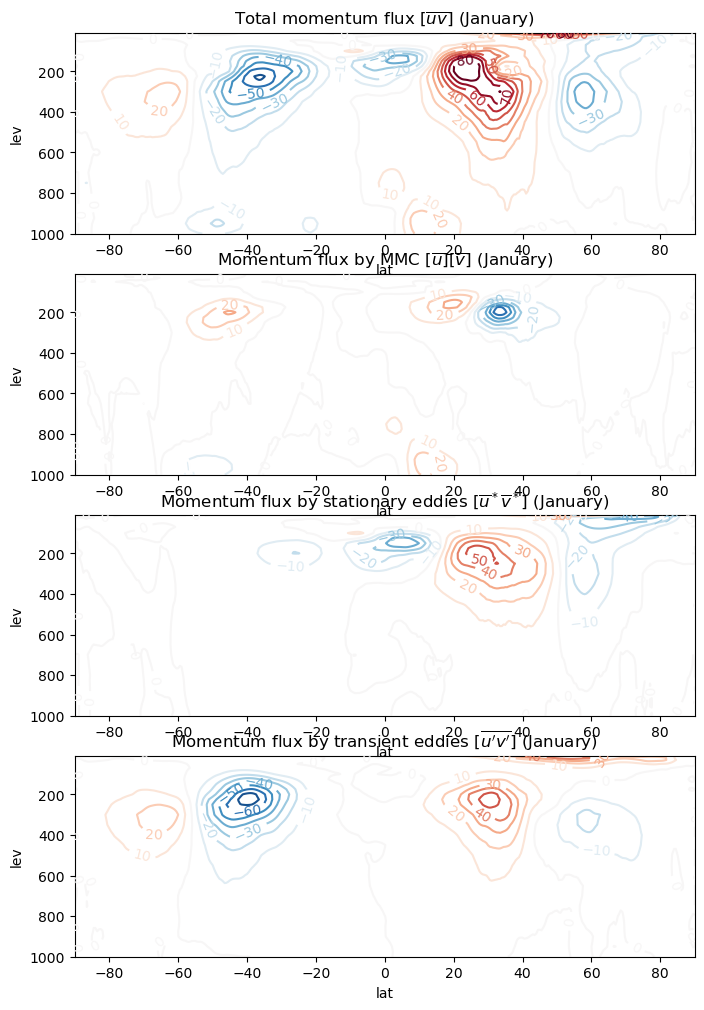

In [22]:
month = 'January'
levs = np.arange(-80,85,10)

fig, axes = plt.subplots(4,1, figsize=(8,12))

for num, flux in enumerate([flux_total_computed,
                             flux_mmc_computed,
                             flux_stationary_computed,
                             flux_transient_computed]
                           ):
    CS = flux[month].plot.contour(ax=axes[num],
                                  yincrease=False, 
                                  levels=levs,
                                 )
    axes[num].clabel(CS)

axes[0].set_title('Total momentum flux $[\overline{uv}]$ (January)')
axes[1].set_title('Momentum flux by MMC $[\overline{u}][\overline{v}]$ (January)')
axes[2].set_title('Momentum flux by stationary eddies $[\overline{u}^* \overline{v}^*]$ (January)')
axes[3].set_title('Momentum flux by transient eddies $[\overline{u^\prime v^\prime}]$ (January)');

A few things to note here:
- The transient eddy term is large at upper levels
- The stationary eddy term is also large in the Northerm Hemisphere winter (stationary waves)
- MMC term is smaller but carries the signature of the overturning circulation

#### What does this look like in the opposite season?

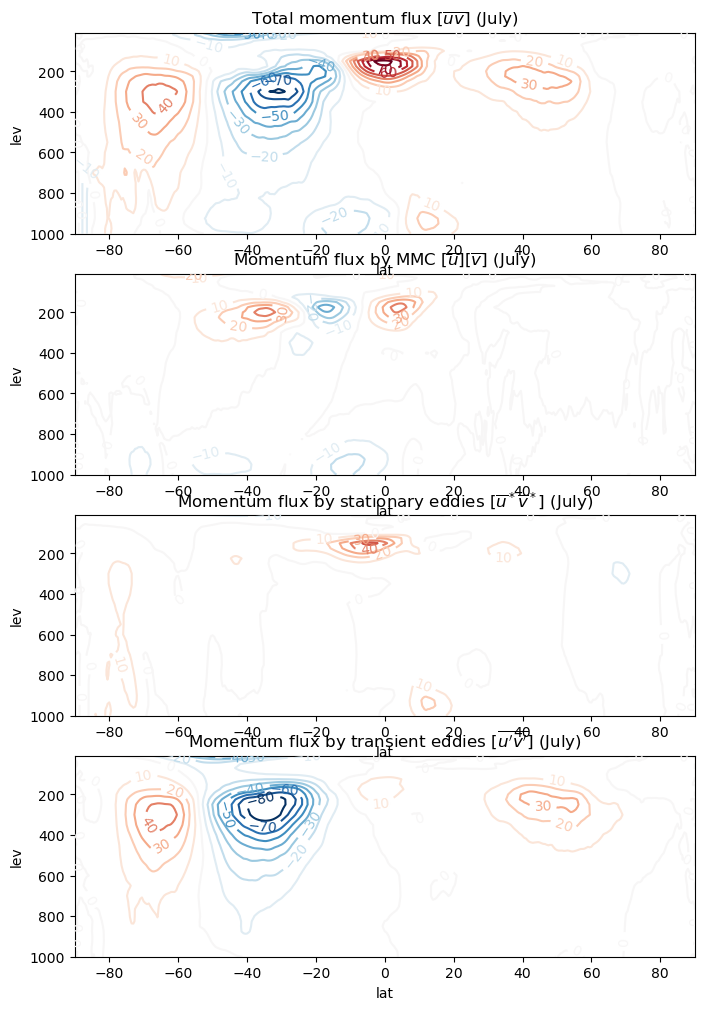

In [23]:
month = 'July'
levs = np.arange(-80,85,10)

fig, axes = plt.subplots(4,1, figsize=(8,12))

for num, flux in enumerate([flux_total_computed,
                             flux_mmc_computed,
                             flux_stationary_computed,
                             flux_transient_computed]
                           ):
    CS = flux[month].plot.contour(ax=axes[num],
                                  yincrease=False, 
                                  levels=levs,
                                 )
    axes[num].clabel(CS)

axes[0].set_title('Total momentum flux $[\overline{uv}]$ (July)')
axes[1].set_title('Momentum flux by MMC $[\overline{u}][\overline{v}]$ (July)')
axes[2].set_title('Momentum flux by stationary eddies $[\overline{u}^* \overline{v}^*]$ (July)')
axes[3].set_title('Momentum flux by transient eddies $[\overline{u^\prime v^\prime}]$ (July)');

The transient eddy term dominates the Southern Hemisphere winter. As usual, the stationary eddy term is small in this season (winter in the South, summer in the North)

### A vertically integrated view

:::{figure-md} markdown-fig
<img src="../images/PO_fig11.8.pdf" alt="Northward transport of momentum" class="bg-primary mb-1" width="800px">

Meridional profiles of the vertical- and zonal-mean northward transport of momentum by all motions (a), transient eddies (b), stationary eddies (c), and mean meridional circulations (d) in units of m$^2$ s$^{-2}$ for annual, DJF, and JJA mean conditions. Source: {cite:t}`physicsofclimate`
:::

## Streamlines of angular momentum flux

In the long term mean, we suppose there's a steady state at each latitude

$$\frac{\partial [\overline{M}]}{\partial t} = 0 $$

so the steady-state budget looks like

$$0 = -\frac{1}{a\cos\phi} \frac{\partial}{\partial \phi} \left( [\overline{vM}] \cos\phi \right) - \frac{\partial}{\partial p} \left( [\overline{\omega M} ] \right) - g \left[ \frac{\partial \overline{Z}}{\partial \lambda} \right] + a \cos\phi \left[ \overline{F_u} \right] $$

Now for notational convenience, let's wrap all our torques together like this:

$$ \frac{\partial [\overline{\tau}]}{\partial p} = \frac{g}{a \cos\phi} \left[ \frac{\partial \overline{Z}}{\partial \lambda} \right] - \left[ \overline{F_u} \right] $$

and subtract out the planetary angular momentum flux since it can't contribute to net poleward transport of absolute angular momentum.

The budget becomes

$$ 0 = -\frac{1}{a\cos\phi} \frac{\partial}{\partial \phi} \left( [\overline{vM_r}] \cos\phi \right) - \frac{\partial}{\partial p} \left( [\overline{\omega M_r} ] + a \cos\phi [\overline{\tau}] \right) $$

Let's now define an *angular momentum streamfunction* $\psi_M$ as follows:

\begin{align*}
2\pi a \cos\phi [\overline{vM_r}] &= -\frac{\partial \psi_M}{\partial p} \\
2\pi a^2 \cos\phi \left( [\overline{\omega M_r}] + a \cos\phi [\overline{\tau}] \right) = \frac{\partial \psi_M}{\partial \phi}
\end{align*}

(This defintion should satisfy non-divergence in the $p-\phi$ plane. Does it?)

The streamfunction $\psi_M$ is a function in the $(\phi, p)$ plane whose contours give the direction of the angular momentum transport.

### A plot of the streamlines

This gives a visual sense of the direction of angular momentum transport by various components of the flow:

:::{figure-md} markdown-fig
<img src="../images/PO_fig11.13.pdf" alt="Northward transport of momentum" class="bg-primary mb-1" width="800px">

Streamlines of the nondivergent component of the zonal-mean transport of relative angular momentum in the atmosphere. Source: {cite:t}`physicsofclimate`
:::

Some things to note here:
- We have a near-surface source of angular momentum in the tropics *(frictional torque associated with easterly trade winds)*
- There is upward tranpsort of angular momentum by the mean meridional circulation in the tropics / subtropics
- Horizontal (poleward) transport of angular momentum in upper tropopsphere associated with eddies
- Downward transport in the midlatitudes
- A sink in westerly angular momentum in midlatitudes *(frictional torque associated with surface westerlies)*

Seasonally, the main source of angular momentum is in the tropics / subtropics of the winter hemisphere where the easterly trades are strongest.